In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
from scipy.interpolate import make_interp_spline

In [4]:
# hierarchical probing

#IEMOCAP PT

I_PT_frame = [0.5393215027762929,0.5406392619324453,0.5361511743311935,0.5036942069772349,0.4709580684454375,0.4363481313538615,
             0.4126715162231631,0.3997789653139901,0.40105628001184523,0.4285008845583443,0.46205539989842439,0.3452946501361398,
             0.42059917493659794]
I_PT_phone = [0.5709333219363342,0.5736474305246732,0.5631062087329875,0.5364144394879908,0.5024256786336995,0.4677339765936467,
             0.4396573414143345,0.4306357694463532,0.4307230486483944,0.4612588853947390,0.50045077964083331,0.40676160789786621,
             0.47032254388087489]
I_PT_word = [0.5974304200997829,0.6145489794741078,0.6065558647616632,0.5812102024743842,0.5484689485182761,0.515029720968782,
            0.4877074024471515,0.4737600938798658,0.47364356216402087,0.5082643437132259,0.5472375227737571,0.45096036454273053,
            0.49999500646071093]
I_PT_utter = [0.8063475743453279,0.8071573378107411,0.79633400151091,0.7755372972799833,0.7515416855726513,0.725790365553002,
             0.7038410963095063,0.6923798466818936,0.6922769846203982,0.712223649773752,0.7373824247870328,0.7054755047568603,
             0.712842168474142]

#IEMOCAP FT

I_FT_frame = [0.5301430055020707,0.5327678237826194,0.525615747930049,0.5003269190999808,0.4671580765693028,0.43564008323031866,
             0.4083671062281521,0.3860436885123779,0.37006997932640606,0.36119878098720376,0.33945102127147164,0.3039018232960697,
             0.2816128917976278]
          
          
I_FT_phone = [0.5679434323619642,0.5766334730924673,0.5659710620873298,0.5375288991855908,0.5007393645398366,0.46426299082880207,
             0.43507822997573414,0.4110680986432208,0.39444394921606396,0.3820931212708214,0.3604261198988777,0.32667311049809633,
             0.30635742419360745]
          
          
I_FT_word = [0.6193565237075486,0.624696739371678,0.6130541496759987,0.5857298053713536,0.5489318516100617,0.5131860871492233,
            0.4839126909784684,0.46001105653149205,0.4434381892661971,0.4336317882493631,0.41754124630435974,0.39188709142283024,
            0.36370829202339566]
          
          
I_FT_utter = [0.8035832907080588,0.796994864367292,0.7824318165529328,0.7571108619716691,0.7264893695644047,0.6964658923080421,
             0.67106213709893,0.6519555687167162,0.6412057745225326,0.6317671672615234,0.6179666759298685,0.597885226328617,
             0.5287469201757551]

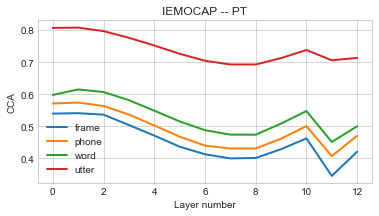

In [8]:
# hierarchical PT
fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(I_PT_frame, label="frame", linewidth=2.0)
plt.plot(I_PT_phone, label="phone", linewidth=2.0)
plt.plot(I_PT_word, label="word", linewidth=2.0)
plt.plot(I_PT_utter, label="utter", linewidth=2.0)
plt.xlabel('Layer number')
plt.ylabel('CCA')
# plt.grid()
plt.legend()
plt.title('IEMOCAP -- PT')
# plt.savefig('/Users/liyuanchao/Desktop/iemocap-pt.png', dpi=400)
plt.show()

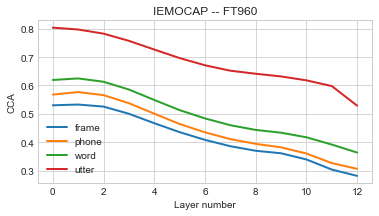

In [7]:
#hierarchical FT
fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(I_FT_frame, label="frame", linewidth=2.0)
plt.plot(I_FT_phone, label="phone", linewidth=2.0)
plt.plot(I_FT_word, label="word", linewidth=2.0)
plt.plot(I_FT_utter, label="utter", linewidth=2.0)
plt.xlabel('Layer number')
plt.ylabel('CCA')
plt.legend()
plt.title('IEMOCAP -- FT960')
# plt.savefig('/Users/liyuanchao/Desktop/iemocap-ft.png', dpi=400)
plt.show()

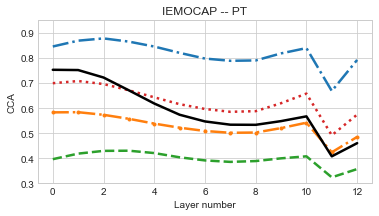

In [3]:
#CCA - iemocap -pt

energy = [0.8452683846632814,0.8684974492588742,0.877519443957917,0.8647167612188242,0.8450559985724688,0.8198828472270361,
         0.7971592123976194,0.7882815879292047,0.7896967749518284,0.8177557959371371,0.8389760231435834,0.6679649665823988,0.7917989359494246]


frequency = [0.5827314495081064,0.5834007495380449,0.5729841219503264,0.5570092164352731,0.5379547454367113,0.5215991296808795,
         0.5085704332780672,0.501303676647467,0.5023446430900207,0.5200227444358958,0.5415415790489578,0.42359570135382774,0.4848956111941062]


voice_quality = [0.39613207554226454,0.41831142235338664,0.4292272028529279,0.42990004224716594,0.42051040830191655,0.40359113038275574,
         0.3911873159879779,0.38534688987887894,0.38863218038449093,0.3994970780288829,0.4075233504978254,0.32382618462438617,0.3567722192093146]


spectral = [0.6989778912968376,0.7075812370010894,0.6956454258691781,0.6706708641727155,0.6427507528707571,0.6153526059445384,
         0.5962209703986061,0.5849667491168171,0.5875112741730683,0.6192139403204622,0.6575298406950032,0.491365855744671,0.573870023067511]


mfcc = [0.752440443532127,0.7513858527880862,0.7216582749403233,0.6705363637289198,0.618061250534567,0.5732873972125379,
         0.5465528796599627,0.5335866929031148,0.5330964636796861,0.5478645568622242,0.5668029523602715,0.4075233504978254,0.46001603198513086]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(energy, '-.', label="Energy", linewidth=2.5)
plt.plot(frequency, '-..', label="Frequency", linewidth=2.5)
plt.plot(voice_quality, '--', label="Voice quality", linewidth=2.5)
plt.plot(spectral, ':', label="Spectral", linewidth=2.5)
plt.plot(mfcc, 'k', label="MFCC", linewidth=2.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
# plt.legend(weight='bold')
plt.title('IEMOCAP -- PT')
plt.ylim([0.3,0.95])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/cca_iem_pt.png', dpi=400)
plt.show()

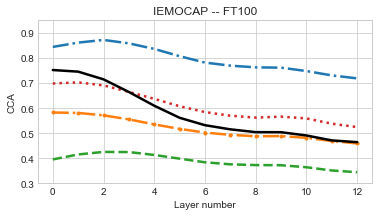

In [4]:
#CCA - iemocap --ft100

energy = [0.8436204031341774,0.8607667350115652,0.8714576571301166,0.8577255344045465,0.8356896336201347,0.8066133804463,
          0.7811817210089874,0.7689181019359979,0.762137082970961,0.7608829447948591,0.7474243770494999,0.730025960053553,0.7181999424098962]

frequency = [0.5822376504890584,0.5804920008240575,0.5708722588399795,0.5546943048834745,0.5348239057012408,0.5167793431963846,
         0.5021642137117789,0.4931602687471524,0.4875166007146513,0.4882167153974385,0.48133362628438725,0.4684104782440036,0.45901184552351254]

voice_quality = [0.3951393063433337,0.41499975553149787,0.4251026118027305,0.42455944364570675,0.4129920427156101,0.39822124707326423,
         0.3837544222088002,0.3756030526727702,0.37262604859673343,0.3720313318833873,0.3639564719282804,0.3511387446396911,0.3441361460811043]

spectral = [0.6978890693286182,0.7021754309035049,0.6902293541216333,0.664295320848513,0.6366144783800824,0.6070971165302461,
         0.5839834321191926,0.5694210198429861,0.5618335622860433,0.5657362100664316,0.5585779449799717,0.5376100833334256,0.5241038459342722]

mfcc = [0.7514533680480642,0.7450367934360586,0.7143271915518834,0.6638963644505522,0.609275668706004,0.5611110316952138,
         0.5315665674839265,0.5150809194857903,0.5039256982960743,0.5036340287770442,0.4906182361460293,0.47093657945594514,0.46398086785454273]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(energy, '-.', label="ene.", linewidth=2.5)
plt.plot(frequency, '-..', label="fre.", linewidth=2.5)
plt.plot(voice_quality, '--', label="qua.", linewidth=2.5)
plt.plot(spectral, ':', label="spe.", linewidth=2.5)
plt.plot(mfcc, 'k', label="mfcc", linewidth=2.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
# plt.legend()
plt.title('IEMOCAP -- FT100')
plt.ylim([0.3,0.95])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/cca_iem_ft100.png', dpi=400)
plt.show()

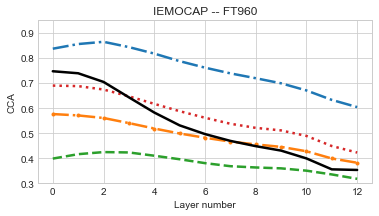

In [5]:
#CCA - iemocap --ft960

energy = [0.8364673378404743,0.8550223898998268,0.8639704498201398,0.8428573027132225,0.8170123363476955,0.7868683761740792,
          0.7609542058964814,0.7381926594214816,0.7188527066632789,0.6985823120024496,0.6701056249308504,0.6324403131231303,0.603733738098492]

frequency = [0.5759923644664011,0.5705235368718489,0.56033854773538,0.539991660376382,0.5183527962782433,0.49855508010852834,
         0.4815653982530434,0.4662568744862726,0.4550044936050167,0.4451756696721595,0.4276744567971328,0.3989744009534619,0.38183735803382196]

voice_quality = [0.39847495722939913,0.41609311618877776,0.4244111565875551,0.42296866279271667,0.4099529177953165,0.3958805675018119,
         0.3803628311420806,0.36818516081349684,0.3630965775383348,0.359574669243464,0.3503375821950734,0.3353240035721363,0.31786753363838904]

spectral = [0.689390214613568,0.6873661389366507,0.673790273561266,0.6466985441552596,0.6167263451844949,0.5874536817183036,
         0.5613135502766912,0.5373630938204935,0.520971258956337,0.5107908720120254,0.48878166738212797,0.44854762738187404,0.42258185542740123]

mfcc = [0.74660989919757,0.7385771100287684,0.7040704068595043,0.6427026394328992,0.582104361780628,0.5309270422598427,
         0.49625492221435,0.46902546813989315,0.4481031296857278,0.4303176949977705,0.3991959505300883,0.35559746912377516,0.353219997022812]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(energy, '-.', label="ene.", linewidth=2.5)
plt.plot(frequency, '-..', label="fre.", linewidth=2.5)
plt.plot(voice_quality, '--', label="qua.", linewidth=2.5)
plt.plot(spectral, ':', label="spe.", linewidth=2.5)
plt.plot(mfcc, 'k', label="mfcc", linewidth=2.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
# plt.legend()
plt.title('IEMOCAP -- FT960')
plt.ylim([0.3,0.95])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/cca_iem_ft960.png', dpi=400)
plt.show()

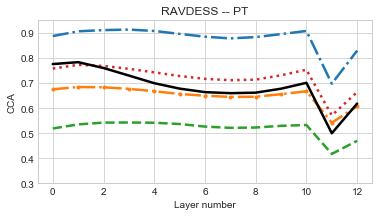

In [6]:
#CCA - ravdess --pt

energy = [0.8869277476104886,0.9058130908806781,0.9105517572210697,0.9126709960355724,0.9072526440204751,0.8954299353917632,
          0.8843576418544098,0.8775855739443079,0.882779519618893,0.8945981805807509,0.9071796832859564,0.6969920297995734,0.8288543972340445]

frequency = [0.6745997299568736,0.683891728078889,0.6825859581294621,0.6764188560420835,0.6670729718675499,0.6560166619962401,
            0.649084720342864,0.644358531582793,0.6449991654781355,0.6552232731030958,0.6668310497473752,0.541422191122733,0.6071417485618749]

voice_quality = [0.5184798256610798,0.534844081252437,0.5419336250385163,0.5423272026734216,0.5414284763036157,0.5363196240728277,
         0.5260332525981204,0.5210128303063137,0.5222774496401339,0.5290674825229855,0.5322869288703298,0.4170517939131999,0.4694650606604689]

spectral = [0.7573723698121742,0.7721362900268818,0.7676895833215478,0.7562837220775382,0.7421188236557897,0.7276130799730064,
         0.7162545471166082,0.7109929053105712,0.713204289154101,0.7306227978760248,0.7526798693302438,0.5707070785354125,0.6633375524641485]

mfcc = [0.7752017219783317,0.7828239041537752,0.7595393162926514,0.7294158009621969,0.6990248484009837,0.6773415821892446,
         0.6633515141421473,0.6592667223342388,0.661277500450326,0.6770646651166763,0.7005047032365894,0.49938441834158687,0.6177734315436894]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(energy, '-.', label="ene.", linewidth=2.5)
plt.plot(frequency, '-..', label="fre.", linewidth=2.5)
plt.plot(voice_quality, '--', label="qua.", linewidth=2.5)
plt.plot(spectral, ':', label="spe.", linewidth=2.5)
plt.plot(mfcc, 'k', label="mfcc", linewidth=2.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
plt.title('RAVDESS -- PT')
plt.ylim([0.3,0.95])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/cca_rav_pt.png', dpi=400)
plt.show()

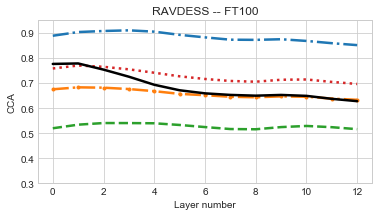

In [7]:
#CCA - ravdess --FT100

energy = [0.8881312546171695,0.9028369137584149,0.9070730847079275,0.9096645030439663,0.9044168226137467,0.8916665092116893,
          0.8816742931073486,0.8724063605109357,0.8717200089246467,0.8742105060604946,0.8674380335737724,0.8584190667680337,0.850737864567252]

frequency = [0.6747225131995979,0.6825266201413058,0.6810719416656137,0.6757022245731147,0.6671850930570572,0.6564353559710575,
            0.65112874860005,0.6449148318365852,0.6428518885935728,0.6464510150625864,0.6449613301418062,0.637657239472535,0.6327602033964932]

voice_quality = [0.5193688758155685,0.533689260640904,0.5401811248133979,0.5400421294648221,0.5392353072564815,0.5324820433176025,
         0.5241114765606713,0.5162821660493725,0.5153546553082883,0.524031054892936,0.528573285368085,0.5236382480584123,0.5157584598004027]

spectral = [0.7576595084032856,0.7694647078127712,0.7643528067588651,0.7542223476062856,0.7406917502355628,0.7264176584260876,
         0.7158191447101928,0.7078540560580971,0.7049287775737426,0.7127288422467405,0.7138054261471571,0.7041557263932319,0.695902900006307]

mfcc = [0.7757565750240734,0.7776886117086512,0.7530798455863489,0.7248435036555576,0.6927326206023033,0.6707911624299777,
         0.6584813554794189,0.6522749836106303,0.6492658650556075,0.6521796781483185,0.648517442370784,0.6366929632868188,0.6273633646038775]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(energy, '-.', label="ene.", linewidth=2.5)
plt.plot(frequency, '-..', label="fre.", linewidth=2.5)
plt.plot(voice_quality, '--', label="qua.", linewidth=2.5)
plt.plot(spectral, ':', label="spe.", linewidth=2.5)
plt.plot(mfcc, 'k', label="mfcc", linewidth=2.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
# plt.legend()
plt.title('RAVDESS -- FT100')
plt.ylim([0.3,0.95])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/cca_rav_ft100.png', dpi=400)
plt.show()

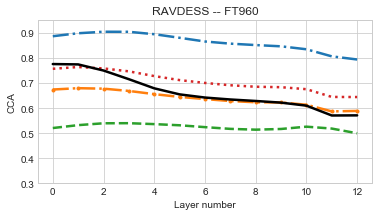

In [8]:
#CCA - ravdess --FT960

energy = [0.8862131916899737,0.8980793381199336,0.9040702093726912,0.9038466685298642,0.894243585369328,0.8799452222496725,
          0.8651962004504368,0.8565928664874232,0.850980645802726,0.8459599671389781,0.8341809811842492,0.8059373398917062,0.7934677029027494]

frequency = [0.6737617603482173,0.6791007456223854,0.6772068793085128,0.6681386406169931,0.6553700627365946,0.6443144007524279,
         0.6357567313117918,0.6278238638167337,0.6229987968646482,0.6222359581983767,0.6130741433481192,0.5866162153290971,0.5884855819825517]

voice_quality = [0.5202907918289663,0.5318192764555312,0.5392313480633165,0.5395854349028013,0.5358812885128647,0.5312540054448265,
         0.5238348013371401,0.5169312953127528,0.5137716894174709,0.5165288747513084,0.5256833549113895,0.5181372264994547,0.4994346934625875]

spectral = [0.7564337913726241,0.763406151230317,0.7578436607502249,0.7461913659128626,0.7273433496818671,0.7113344082490112,
         0.700011524571393,0.690742533655611,0.6848604993004714,0.6830522657654271,0.6750997327428184,0.644213195604975,0.6438172376019335]

mfcc = [0.7752759336317043,0.7738728036047461,0.7494580012227,0.7149035873801841,0.678550584635433,0.6544217127662696,
         0.6417724046651394,0.6340466731630361,0.6281243541476748,0.6215221925287048,0.6094985198293741,0.5703040458895448,0.5707775267164528]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(energy, '-.', label="ene.", linewidth=2.5)
plt.plot(frequency, '-..', label="fre.", linewidth=2.5)
plt.plot(voice_quality, '--', label="qua.", linewidth=2.5)
plt.plot(spectral, ':', label="spe.", linewidth=2.5)
plt.plot(mfcc, 'k', label="mfcc", linewidth=2.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
# plt.legend()
plt.title('RAVDESS -- FT960')
plt.ylim([0.3,0.95])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/cca_rav_ft960.png', dpi=400)
plt.show()

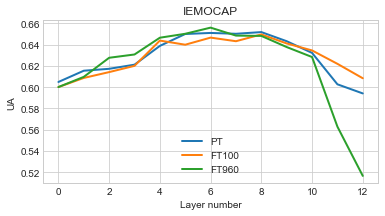

In [5]:
# Acc -iemocap

PT = [0.6049,0.6155,0.6173,0.6212,0.6389,0.6501,0.6511,0.6503,0.6519,0.6433,0.6323,0.6027,0.5941]
FT100 = [0.6001,0.6087,0.6142,0.6201,0.6439,0.6400,0.6467,0.6433,0.6497,0.6412,0.6346,0.6220,0.6084]
FT960 = [0.6001,0.6097,0.6277,0.6308,0.6466,0.6503,0.6561,0.6486,0.6483,0.6378,0.6284,0.5628,0.5164]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(PT, label="PT", linewidth=2.0)
plt.plot(FT100, label="FT100", linewidth=2.0)
plt.plot(FT960, label="FT960", linewidth=2.0)

plt.xlabel('Layer number')
plt.ylabel('UA')
plt.legend(loc=8)
plt.title('IEMOCAP')
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/SER_acc_iem', dpi=400)
plt.show()


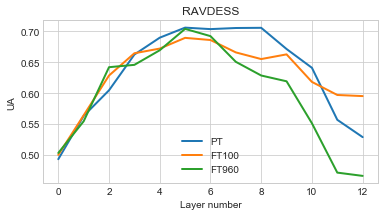

In [4]:
# Acc -ravdess

PT = [0.4927,0.5629,0.6045,0.6625,0.6899,0.7062,0.7038,0.7056,0.7059,0.6715,0.6410,0.5566,0.5285]
FT100 = [0.4997,0.5639,0.6285,0.6646,0.6722,0.6896,0.6861,0.6660,0.6552,0.6628,0.6181,0.5969,0.5951]
FT960 = [0.5028,0.5542,0.6420,0.6458,0.6695,0.7042,0.6924,0.6507,0.6285,0.6191,0.5510,0.4709,0.4656]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(PT, label="PT", linewidth=2.0)
plt.plot(FT100, label="FT100", linewidth=2.0)
plt.plot(FT960, label="FT960", linewidth=2.0)

plt.xlabel('Layer number')
plt.ylabel('UA')
plt.legend(loc=8)
plt.title('RAVDESS')
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/SER_acc_rav', dpi=400)
plt.show()


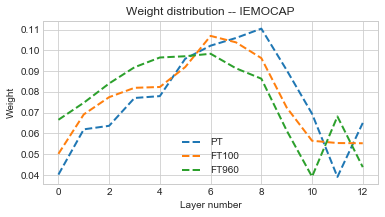

In [7]:
# weight -iemocap

PT = [0.0402, 0.0620, 0.0637, 0.0771, 0.0780, 0.0960, 0.1023, 0.1060, 0.1105, 0.0905, 0.0695, 0.0391, 0.0651]
FT100 = [0.0502, 0.0692, 0.0775, 0.0820, 0.0824, 0.0920, 0.1070, 0.1039, 0.0963, 0.0725, 0.0565, 0.0554, 0.0553]
FT960 = [0.0666, 0.0748, 0.0841, 0.0919, 0.0966, 0.0972, 0.0984, 0.0914, 0.0864, 0.0614, 0.0392, 0.0682, 0.0438]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(PT, label="PT", linestyle='--', linewidth=2.0)
plt.plot(FT100, label="FT100", linestyle='--', linewidth=2.0)
plt.plot(FT960, label="FT960", linestyle='--', linewidth=2.0)

plt.xlabel('Layer number')
plt.ylabel('Weight')
plt.legend(loc=8)
plt.title('Weight distribution -- IEMOCAP')
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/weight_iemocap', dpi=400, transparent=True)

plt.show()

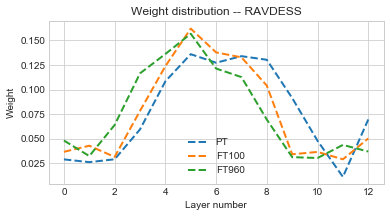

In [8]:
# weight -ravdess

PT = [0.0290, 0.0262, 0.0291, 0.0595, 0.1084, 0.1360, 0.1273, 0.1340, 0.1303, 0.0914, 0.0479, 0.0112, 0.0696]
FT100 = [0.0367, 0.0429, 0.0315, 0.0783, 0.1238, 0.1620, 0.1378, 0.1328, 0.1040, 0.0342, 0.0366, 0.0291, 0.0503]
FT960 = [0.0482, 0.0324, 0.0640, 0.1165, 0.1362, 0.1568, 0.1214, 0.1127, 0.0695, 0.0313, 0.0304, 0.0437, 0.0370]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(PT, label="PT", linestyle='--', linewidth=2.0)
plt.plot(FT100, label="FT100", linestyle='--', linewidth=2.0)
plt.plot(FT960, label="FT960", linestyle='--', linewidth=2.0)

plt.xlabel('Layer number')
plt.ylabel('Weight')
plt.legend(loc=8)
plt.title('Weight distribution -- RAVDESS')
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/weight_ravdess', dpi=400, transparent=True)

plt.show()

In [ ]:
layer 0: fine-tuning makes the overall weight of w2v2 layers smaller
layer 11: fine-tuning makes the 11th layer more important
layer 12: fine-tuning makes the last layer less important

In [ ]:
WER PT : ~32%

SER Acc.
--layer ave--
0.6673

--layer rm--
0.6673

--layer weighted--
0.6766

    
WER FT : ~25%

SER Acc.
--layer ave--
0.6701

--layer rm--
0.6654

--layer weighted--
0.6831

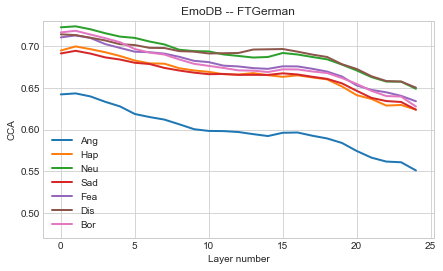

In [22]:
# discriminative emotion - berlin

Ang = [0.6420684377028671,0.6432613493757523,0.6396469796075613,0.6332173492670765,0.6277064158809953,0.6186398989649764,0.6149749913659251,0.6119503335870896,0.6063527200709284,0.6004789707782222,0.5983782289752547,0.5981800066828574,0.5970912507064108,0.5945566388328550,0.5922716555442942,0.5961815050340802,0.5965043129101380,0.5926488179195413,0.5893971338124232,0.5840173839562658,0.5744061904366509,0.5664038835094969,0.5617322875976424,0.5609261437969527,0.5511284940084763]
Hap = [0.6945305051220243,0.6994366476355963,0.6961666948490542,0.6924779103796341,0.6879708913660455,0.6825529000474251,0.6791784269193790,0.6787737619821874,0.6733721800041128,0.6707249226871629,0.6689873001369648,0.6662425679094400,0.6657888034089343,0.6675145523560150,0.6650324498292208,0.6630983583245096,0.6648888565366561,0.6623653986894162,0.6600349874846331,0.6515724211264329,0.6411388070779649,0.6365888131820764,0.6286897261528271,0.6294226027104889,0.6238533608225196]
Neu = [0.7222856477784974,0.7234660349309069,0.7199475517542485,0.7152150671478624,0.7111638310417956,0.7096076232456529,0.7052766936126760,0.7018231946141661,0.6954580469607567,0.6938418545606198,0.6934677141113531,0.6898357209656374,0.6880471905446535,0.6861386635507566,0.6867892740559765,0.6915803308919859,0.6897655559630043,0.6868079931168142,0.6840094602003515,0.6777337552202126,0.6706723699479111,0.6627326112389228,0.6574359720435282,0.6573204234675478,0.6487643836763513]
Sad = [0.6910102650842413,0.6942007646979176,0.6908711199010287,0.6863159234187092,0.6837574456057622,0.6798889758385716,0.6783843608356542,0.6737421262125929,0.6706312497013559,0.6680907727946098,0.6662378018381214,0.6665175879389035,0.6654550851634264,0.6654335966047545,0.6653748748511588,0.6672448956721064,0.6659000168875921,0.6631233716557347,0.6606144178919714,0.6552830705479737,0.6463281219514048,0.6378800596180172,0.6341022651940127,0.6329912345242980,0.6237778256932065]
Fea = [0.7102252963247495,0.7125918242446035,0.7095652942581101,0.7022135710466176,0.6976533991845849,0.6931043774265987,0.6925337619757658,0.6908084977197881,0.6870170981315487,0.6822295131167594,0.6806536402445710,0.6764280055346419,0.6755065549637000,0.6735102897876036,0.6726094449434817,0.6756394286104725,0.6755385166407615,0.6727052074144964,0.6693178665119098,0.6634626080037116,0.6527436482897393,0.6474053659791880,0.6445590034924396,0.6403342982404057,0.6338737997732036]
Dis = [0.7138969061094017,0.7129384807176001,0.7098304268649696,0.7065819249473141,0.7020889710560343,0.7010787944023289,0.6977159591503648,0.6975195327017512,0.6938036697150960,0.6932200893160909,0.6909704420975972,0.6913144043736200,0.6915669708411434,0.6956996997003667,0.6959958829751811,0.6963162627694380,0.6931761029773488,0.6896667444411500,0.6868055084961513,0.6781544462353847,0.6724804936509454,0.6637299780508137,0.6580501916908590,0.6574153525863929,0.6501339456789175]
Bor = [0.7162347598002841,0.7181324356099883,0.7136862699670351,0.7092873525721310,0.7044483378680388,0.6963612418306615,0.6920467441208462,0.6897368684323101,0.6838923512321363,0.6786822584275256,0.6761516788150660,0.6736912516660143,0.6708247794852520,0.6704771662645554,0.6688271555390690,0.6720228062209472,0.6719071416813872,0.6694890050232298,0.6676380034155678,0.6616592589082994,0.6545808458555590,0.6462887708527443,0.6400910917275326,0.6394748618246948,0.6275449243901980]

fig = plt.figure(figsize=(7, 4))
plt.style.use('seaborn-whitegrid')
plt.plot(Ang, label="Ang", linewidth=2.0)
plt.plot(Hap, label="Hap", linewidth=2.0)
plt.plot(Neu, label="Neu", linewidth=2.0)
plt.plot(Sad, label="Sad", linewidth=2.0)
plt.plot(Fea, label="Fea", linewidth=2.0)
plt.plot(Dis, label="Dis", linewidth=2.0)
plt.plot(Bor, label="Bor", linewidth=2.0)


plt.xlabel('Layer number')
plt.ylabel('CCA')
plt.legend()
plt.title('EmoDB -- FTGerman')
plt.ylim([0.47,0.73])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/discri-edb.png', dpi=400)
plt.show()

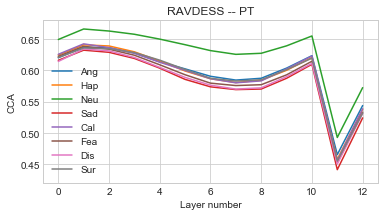

In [14]:
# discriminative emotion - RAVDESS PT

Ang = [0.6202405408983311, 0.636811311667902 ,0.6362450563202104 ,0.6276544690003779 ,0.6137057123394992, 0.6024245276187726, 0.5906205458922138, 0.5845790345855731, 0.5874743773540166, 0.6036378486197241, 0.6234406303877943, 0.4657311585948676, 0.5439909643654535]
Hap = [0.6244696254284219, 0.6407483650828718, 0.6389459647240441, 0.6296276389621449, 0.6149889323847445, 0.5990269041305393, 0.5866829399524369, 0.580615521574792, 0.5843042141372039, 0.60014878832911, 0.6204579145523875, 0.4582597295462214, 0.5380585441092789]
Neu = [0.6492420187230913, 0.6660143089685617, 0.6627645175542792, 0.6576067641266641, 0.6498683634404133, 0.6409585090369645, 0.6315597121272964, 0.625589075766359, 0.6272735689389961, 0.6391404192535205, 0.6548867612762034, 0.49304766060487987, 0.5725064998244758]
Sad = [0.6160658600672515, 0.632245760987443 ,0.6288366832232386 ,0.619052368266145, 0.6035665238540718, 0.5856693735420105, 0.5738027520949253, 0.5693808376158742, 0.5702848502457185, 0.5874099414683256, 0.6096966553724932, 0.44175178807675514, 0.5242579761950841]
Cal = [0.625653965064181 ,0.6423352482877221 ,0.6362662476011942 ,0.627387242947102, 0.6130294350682977, 0.6000542291780371, 0.586732207381222, 0.5801779587420319, 0.5832916355041848, 0.6022844887078544, 0.622982014215575, 0.45649445160860574, 0.5388209407808237]
Fea = [0.6223423471908529, 0.6384338808922209, 0.6337880125640991, 0.6241934354573838, 0.60895707602842, 0.5930597592825769, 0.5796861444747703, 0.575808894008285, 0.5771753547732514, 0.5928841854580562, 0.6145953712251094, 0.4534349337883008, 0.5333050281989347]
Dis = [0.6142619623778153, 0.634093439637191 ,0.6311303160224613 ,0.6205564707251139, 0.6047976874735973, 0.588853843044361, 0.5764485668454665, 0.5702092193347312, 0.5721943162720871, 0.590035897593829, 0.6111424484028654, 0.45069012271689535, 0.5314314576747668]
Sur = [0.6206163693365527, 0.6357073522610799, 0.6345187079495462, 0.6285687887760957, 0.6163365619184388, 0.6014621269316873, 0.5874301522742753, 0.5830287788530422, 0.5850957197608418, 0.601090026503231, 0.6194701114919348, 0.45563344642106174, 0.5317844974463878]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(Ang, label="Ang", linewidth=1.5)
plt.plot(Hap, label="Hap", linewidth=1.5)
plt.plot(Neu, label="Neu", linewidth=1.5)
plt.plot(Sad, label="Sad", linewidth=1.5)
plt.plot(Cal, label="Cal", linewidth=1.5)
plt.plot(Fea, label="Fea", linewidth=1.5)
plt.plot(Dis, label="Dis", linewidth=1.5)
plt.plot(Sur, label="Sur", linewidth=1.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
plt.legend()
plt.title('RAVDESS -- PT')
plt.ylim([0.42,0.68])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/dis-rav-pt.png', dpi=400)
plt.show()

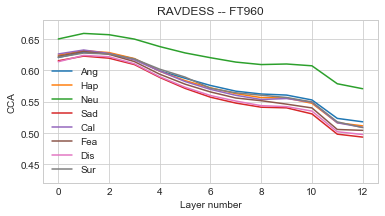

In [13]:
# discriminative emotion - RAVDESS FT960

Ang = [0.6205152265051226, 0.6290485016521831, 0.6272127022051542, 0.6182474524931056, 0.5992196904995316, 0.5874492457874438, 0.5759898779608337, 0.5668945012946243, 0.5623711308602609, 0.5606522850093474, 0.5528822767260059, 0.5234780520830794, 0.5180342104400275]
Hap = [0.6242753177604639, 0.6314491777278807, 0.6284131531921123, 0.6188753826371789, 0.5986541428814215, 0.5837175192320877, 0.5722558574282242, 0.562942578027937, 0.5566768959569907, 0.5559715023442316, 0.547569231174405, 0.5165382341860784, 0.51159696811861]
Neu = [0.6500860027994668, 0.6589489278896161, 0.6568947365418478, 0.6499143301104339, 0.6379773784709777, 0.6278580876304476, 0.6202213599780214, 0.6132555575903307, 0.6092979950689265, 0.6102008468884378, 0.6073353679795375, 0.5787113248924092, 0.5707782529096853]
Sad = [0.6153850746446887, 0.6227769307262084, 0.619475584794632, 0.6093063432843833, 0.5887810367403251, 0.5713080463120402, 0.5572713914548308, 0.5479160026130727, 0.5413009860419552, 0.5402916682859805, 0.530647919591772, 0.4983438299617589, 0.4936650759078289]
Cal = [0.626239951593986,  0.6325095705646189,  0.62703898184001, 0.6167302127351462, 0.598954631512181, 0.5822424718935217, 0.5697330921242747, 0.5602800227377375, 0.5536112551897964, 0.5551376776698662, 0.5493080764166098, 0.5164661061518172, 0.5092711481354912]
Fea = [0.6225472285993124, 0.6302181759468316, 0.6255922363294104, 0.6140612290688923, 0.5939042384717073, 0.578043812514935, 0.5656369838367883, 0.555979921973193, 0.5516765312479444, 0.5462069810959383, 0.5401697662817885, 0.50580260012804, 0.5044167062942894]
Dis = [0.6138582236187705, 0.6239077606047974, 0.6217783233296779, 0.6105440510482059, 0.5899085426152062, 0.5731975109868397, 0.5599318758855456, 0.5511400579785605, 0.5437558347533777, 0.5422448740309304, 0.535134869626388, 0.5021961540330391, 0.49781558445320434]
Sur = [0.6208889125941315, 0.6276202966710618, 0.6261771068569846, 0.618286414267153, 0.6019386484770405, 0.5893176659885966, 0.5715778785646034, 0.5642842461485614, 0.560393700462649, 0.5568185102178146, 0.5496969175343402, 0.5179682342558052, 0.5088277936283968]

fig = plt.figure(figsize=(6, 3))
plt.style.use('seaborn-whitegrid')
plt.plot(Ang, label="Ang", linewidth=1.5)
plt.plot(Hap, label="Hap", linewidth=1.5)
plt.plot(Neu, label="Neu", linewidth=1.5)
plt.plot(Sad, label="Sad", linewidth=1.5)
plt.plot(Cal, label="Cal", linewidth=1.5)
plt.plot(Fea, label="Fea", linewidth=1.5)
plt.plot(Dis, label="Dis", linewidth=1.5)
plt.plot(Sur, label="Sur", linewidth=1.5)

plt.xlabel('Layer number')
plt.ylabel('CCA')
plt.legend()
plt.title('RAVDESS -- FT960')
plt.ylim([0.42,0.68])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/dis-rav-FT960.png', dpi=400)
plt.show()

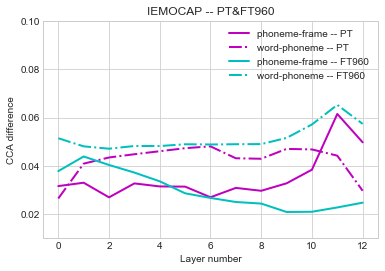

In [17]:
# hierarchy difference

p_f_pt = [0.0316118191600413,0.03300816859222788,0.02695503440179392,0.03272023251075595,0.03146761018826194,0.03138584523978516,0.026985825191171375,0.03085680413236308,0.029666768636549212,0.03275800083639474,0.038395379742408975,0.06146695776172639,0.049723368944276924]
w_p_pt = [0.026497098163447808,0.040901548949433875,0.043449656028675565,0.044795762986393206,0.04604326988457652,0.047295744375135285,0.048050061032816505,0.04312432443351183,0.04292051351562559,0.047005458318486015,0.04678674313292375,0.04419875664486378,0.02967246257983519]
p_f_ft = [0.037800426859894154,0.043865649309848265,0.040355314157280886,0.03720198008561082,0.03358128797053456,0.028622907598484015,0.02671112374758211,0.025024410130843777,0.024373969889657898,0.020894340283618418,0.020975098627406707,0.022771287202027257,0.0247445323959804]
w_p_ft = [0.051413091345583806,0.04806326627921076,0.04708308758866819,0.04820090618576223,0.04819248707022439,0.04892309632042097,0.04883446100273392,0.04894295788827119,0.04899424005013309,0.05153866697854159,0.05711512640548133,0.06521398092473374,0.0573508678297876]

fig = plt.figure(figsize=(6, 4))
# plt.style.use('seaborn-whitegrid')
plt.plot(p_f_pt, 'm-', label="phoneme-frame -- PT", linewidth=2.0)
plt.plot(w_p_pt, 'm-.', label="word-phoneme -- PT", linewidth=2.0)
plt.plot(p_f_ft, 'c-', label="phoneme-frame -- FT960", linewidth=2.0)
plt.plot(w_p_ft, 'c-.', label="word-phoneme -- FT960", linewidth=2.0)

plt.xlabel('Layer number')
plt.ylabel('CCA difference')
plt.legend()
plt.title('IEMOCAP -- PT&FT960')
plt.ylim([0.01,0.10])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/hier-iem.png', dpi=400)
plt.show()

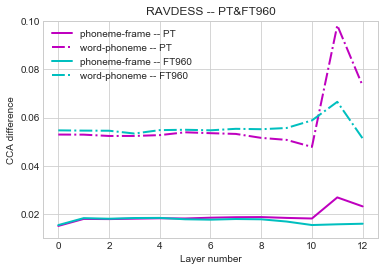

In [18]:
# hierarchy difference

p_f_pt = [0.015121138717358429,0.018022597202956847,0.01794992163296283,0.01813000560463629,0.018288583541298586,0.018196547834739563,0.01852904999974825,0.018728890507942464,0.018786613114811446,0.0184411865510562,0.018195245793551473,0.026924068338320783,0.023208693594435725]
w_p_pt = [0.052937635487561585,0.052903789473523144,0.05235730836884722,0.05236522492059381,0.052706066620141434,0.053873106108580426,0.05350974372388173,0.05320145410131749,0.05156400210977852,0.05073224143536381,0.047830902253618524,0.09815725909882916,0.0730744614215143]
p_f_ft = [0.015467196025962249,0.018345450511247585,0.018098424160035154,0.01839218333142112,0.018444198713227666,0.017874651836321864,0.017709899243852023,0.01798000363549701,0.0178639823926926,0.016939579727045684,0.015490626824636311,0.015792226018935762,0.01603212910643881]
w_p_ft = [0.054676879770615305,0.0545706158450705,0.05452254752875252,0.05336357141873571,0.05477527009331651,0.0549218184952005,0.05469920573174469,0.055312401944943135,0.05515416996680378,0.055654932917776845,0.058795185225301916,0.06648464591505138,0.05132226291510761]

fig = plt.figure(figsize=(6, 4))
# plt.style.use('seaborn-whitegrid')
plt.plot(p_f_pt, 'm-', label="phoneme-frame -- PT", linewidth=2.0)
plt.plot(w_p_pt, 'm-.', label="word-phoneme -- PT", linewidth=2.0)
plt.plot(p_f_ft, 'c-', label="phoneme-frame -- FT960", linewidth=2.0)
plt.plot(w_p_ft, 'c-.', label="word-phoneme -- FT960", linewidth=2.0)

plt.xlabel('Layer number')
plt.ylabel('CCA difference')
plt.legend()
plt.title('RAVDESS -- PT&FT960')
plt.ylim([0.01,0.10])
plt.savefig('/afs/inf.ed.ac.uk/user/s20/s2057508/Documents/phdwork/Layerwise/hier-rav.png', dpi=400)
plt.show()